# GDP 데이터 분석

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gc

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Data Load

In [2]:
df = pd.read_csv('../data/preprocessed/3_bus_preprocessed.csv')
GDP_df = pd.read_csv('../data/added_features/국제 주요국 국내총생산(GDP)_10155934.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_16103/2542149168.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/3_bus_preprocessed.csv')


In [3]:
df.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,인근 지하철 역 개수,가장 가까운 버스 정류장 거리,가장 가까운 버스 정류장 index,가장 가까운 버스 정류장 노드 ID,가장 가까운 버스 정류소번호,가장 가까운 버스 정류소명,가장 가까운 버스 정류소 타입,가장 가까운 버스 정류장 X좌표,가장 가까운 버스 정류장 Y좌표,인근 버스 정류장 개수
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,2.0,61.89584,11345.0,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,2.0,61.89584,11345.0,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,2.0,61.89584,11345.0,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,2.0,61.89584,11345.0,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,2.0,61.89584,11345.0,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0


In [4]:
GDP_df.drop(['통계표', '계정항목', '단위', '변환'], axis=1, inplace=True)
GDP_df

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"547,743.1","626,989.2","702,696.2","792,532.0","934,707.9","1,052,610.2","1,172,464.5","1,049,167.7","943,708.5","1,143,672.2",...,"1,484,488.5","1,466,038.9","1,499,679.8","1,623,074.1","1,725,373.4","1,651,422.9","1,644,312.8","1,818,432.2","1,673,916.5","1,712,792.9"


In [5]:
GDP_df = GDP_df.transpose()
GDP_df.reset_index(inplace=True)
GDP_df.columns = ['Year', 'GDP']

GDP_df

,Year,GDP
0,2001,"547,743.1"
1,2002,"626,989.2"
2,2003,"702,696.2"
3,2004,"792,532.0"
4,2005,"934,707.9"
5,2006,"1,052,610.2"
6,2007,"1,172,464.5"
7,2008,"1,049,167.7"
8,2009,"943,708.5"
9,2010,"1,143,672.2"


In [20]:
GDP_df['Year'] = GDP_df['Year'].astype(int) # int형으로 변환
GDP_df['GDP'] = GDP_df['GDP'].str.replace(',', '').astype(float) # float형으로 변환 -> ','을 제거해야 된다.

In [22]:
GDP_df

,Year,GDP
0,2001,547743.1
1,2002,626989.2
2,2003,702696.2
3,2004,792532.0
4,2005,934707.9
5,2006,1052610.2
6,2007,1172464.5
7,2008,1049167.7
8,2009,943708.5
9,2010,1143672.2


# 시각화

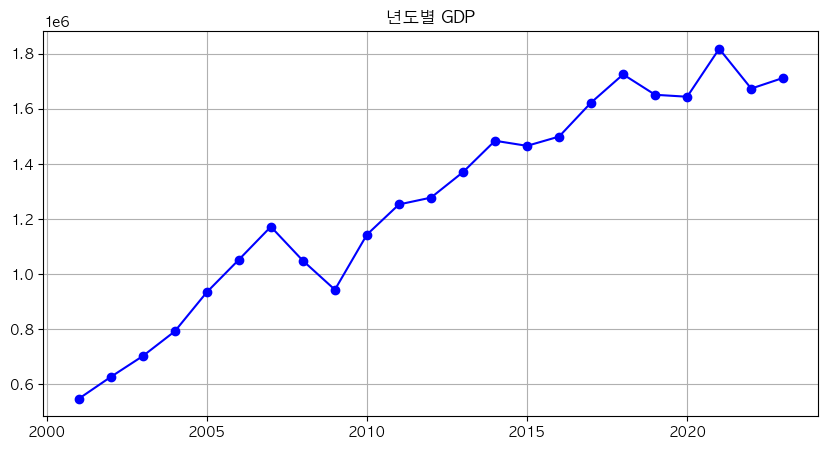

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(GDP_df['Year'], GDP_df['GDP'], marker='o', linestyle='-', color='b')
plt.title('년도별 GDP')
plt.grid(True)
plt.show()

# 원본에 적용

In [6]:
df['계약년'] = df['계약년월'].astype(str).str[:4].astype(int)
df['계약월'] = df['계약년월'].astype(str).str[4:].astype(int)

In [23]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,가장 가까운 버스 정류장 노드 ID,가장 가까운 버스 정류소번호,가장 가까운 버스 정류소명,가장 가까운 버스 정류소 타입,가장 가까운 버스 정류장 X좌표,가장 가까운 버스 정류장 Y좌표,인근 버스 정류장 개수,계약년,계약월,GDP
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2017,12,NaN
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2017,12,NaN
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2017,12,NaN
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2018,1,NaN
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2018,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,106000471.0,7464.0,우디안아파트114동앞,일반차로,127.107073,37.619326,7.0,2023,7,NaN
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,106000471.0,7464.0,우디안아파트114동앞,일반차로,127.107073,37.619326,7.0,2023,7,NaN
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,106000471.0,7464.0,우디안아파트114동앞,일반차로,127.107073,37.619326,7.0,2023,8,NaN
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,106000471.0,7464.0,우디안아파트114동앞,일반차로,127.107073,37.619326,7.0,2023,9,NaN


In [24]:
GDP_mapping = pd.Series({year: gdp for year, gdp in zip(GDP_df['Year'], GDP_df['GDP'])})

df['GDP'] = np.nan
df['GDP'] = df['GDP'].fillna(df['계약년'].map(GDP_mapping))

In [25]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,가장 가까운 버스 정류장 노드 ID,가장 가까운 버스 정류소번호,가장 가까운 버스 정류소명,가장 가까운 버스 정류소 타입,가장 가까운 버스 정류장 X좌표,가장 가까운 버스 정류장 Y좌표,인근 버스 정류장 개수,계약년,계약월,GDP
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2017,12,1623074.1
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2017,12,1623074.1
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2017,12,1623074.1
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2018,1,1725373.4
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,122000333.0,23445.0,개포우성아파트,일반차로,127.057864,37.476564,7.0,2018,1,1725373.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,106000471.0,7464.0,우디안아파트114동앞,일반차로,127.107073,37.619326,7.0,2023,7,1712792.9
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,106000471.0,7464.0,우디안아파트114동앞,일반차로,127.107073,37.619326,7.0,2023,7,1712792.9
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,106000471.0,7464.0,우디안아파트114동앞,일반차로,127.107073,37.619326,7.0,2023,8,1712792.9
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,106000471.0,7464.0,우디안아파트114동앞,일반차로,127.107073,37.619326,7.0,2023,9,1712792.9


In [26]:
df.to_csv('../data/preprocessed/4_GDP.csv', index=False)

In [27]:
df1 = pd.read_csv('../data/preprocessed/3_bus_preprocessed.csv')
print(df1.shape)
print(df.shape)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_16103/3362873643.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('../data/preprocessed/3_bus_preprocessed.csv')


(1128094, 72)
(1128094, 75)
